<a href="https://colab.research.google.com/github/min02choi/Style-Color-Detect/blob/main/240526_generate_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

스타일을 한정하여
1. 해당 스타일에서 그라데이션 영역을 알아내기
  - 원본 이미지에서 좌 우로의 픽셀 차를 구해서 변화량(차이)이 있는 부분이 그라데이션이 적용된 구간임
2. 해당 영역 안에서 그라데이션이 적용된 각도 구하기
3. 2번을 활용해서 그라데이션이 적용된 두 개의 색 알아내기
***
4. 번역된 글자로 텍스트를 만들고(ex. 영어) 해당 텍스트를 포함하는 가장 작은 직사각형을 그림
5. 4에서 구한 직사각형에 아까 구한 정보로 그라데이션을 구현
6. 해당 영역에 대해 픽셀 값 옮기기
  - 만든 텍스트에 대해서 레이블 이미지가 필요할 것 같음


## 1. 해당 텍스트에서 그라데이션이 적용된 영역을 알아내기

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

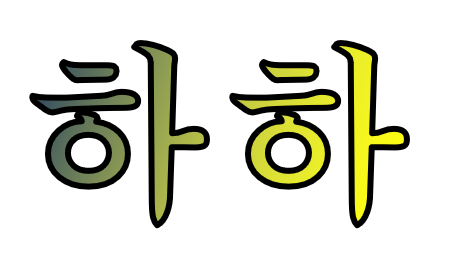

(257, 472, 4)


In [ ]:
IMAGE_PATH = "하하20.png"

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
print(image.shape)

In [ ]:
# 그라데이션이 적용된 영역을 반환
def getGradationPart(image, num):
    hist = []
    # 각 픽셀의 화소값
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist.append(tuple(image[i, j]))

    # 픽셀 색상별 등장 횟수 계산
    color_counts = {}
    for color in hist:
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1

    sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)
    print(sorted_colors)
    print(len(sorted_colors))

    # 명확한 색 판별
    # 자르는 임계 선이 필요할 듯
    color_list = []
    for i in range(len(sorted_colors) - 1):
        if (sorted_colors[i][0][3] == 0):
            pass
        elif (sorted_colors[i][1] > sorted_colors[i+1][1] * 3):
            color_list.append(sorted_colors[i])
            break

    print(color_list)


    # 빈 이미지 생성 (모든 픽셀이 0으로 초기화된 배열)

    label_image = image.copy()
    only_grad_image = image.copy()

    # "그라데이션이 아님"이 명확한 부분은 (0, 0, 0, 0)으로 변환
    # 알파 값이 0인 부분, 앞서 구한 빈도 수 높은 색인 경우
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # print(image[i][j][0:3], color_list[0][0:3])
            # print(image[i][j])
            if image[i][j][3] == 0:
                label_image[i][j] = (0, 0, 0, 0)
                only_grad_image[i][j] = (0, 0, 0, 0)
            elif any(np.array_equal(image[i][j][0:3], color[0][0:3]) for color in color_list):
                only_grad_image[i][j] = (0, 0, 0, 0)
                label_image[i][j] = (130, 130, 130, 255)

            else:
                label_image[i][j] = (0, 0, 0, 255)

    return label_image, only_grad_image


(257, 472, 4)
[((0, 0, 0, 0), 93975), ((0, 0, 0, 255), 11965), ((28, 247, 246, 255), 166), ((37, 241, 239, 255), 165), ((36, 242, 240, 255), 159), ((25, 249, 248, 255), 150), ((43, 236, 233, 255), 125), ((26, 248, 247, 255), 123), ((38, 240, 238, 255), 120), ((33, 244, 242, 255), 116), ((31, 245, 244, 255), 108), ((57, 218, 213, 255), 100), ((23, 250, 249, 255), 100), ((56, 220, 215, 255), 97), ((44, 235, 232, 255), 94), ((58, 217, 211, 255), 93), ((85, 144, 128, 255), 91), ((91, 108, 87, 255), 89), ((82, 159, 145, 255), 85), ((76, 177, 166, 255), 84), ((34, 243, 241, 255), 82), ((76, 178, 167, 255), 82), ((77, 176, 165, 255), 82), ((82, 157, 143, 255), 81), ((80, 165, 152, 255), 79), ((27, 248, 247, 255), 79), ((84, 149, 134, 255), 78), ((42, 237, 234, 255), 78), ((41, 237, 235, 255), 78), ((80, 166, 153, 255), 78), ((24, 249, 248, 255), 76), ((34, 243, 242, 255), 75), ((59, 215, 209, 255), 74), ((79, 170, 158, 255), 74), ((41, 238, 235, 255), 73), ((81, 163, 150, 255), 73), ((32, 245

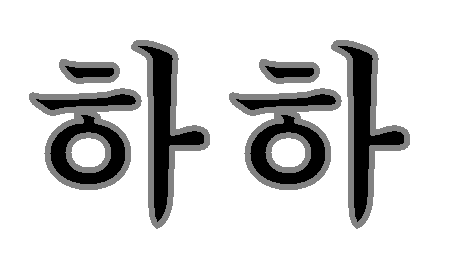

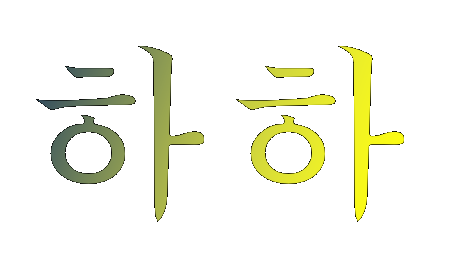

In [ ]:
print(image.shape)
label_image, only_grad_image = getGradationPart(image, 2)
cv2_imshow(label_image)
cv2_imshow(only_grad_image)

## 2. 해당 영역 안에서 그라데이션이 적용된 각도 구하기

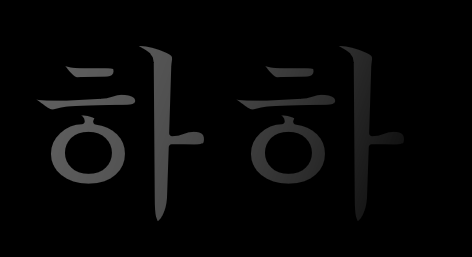

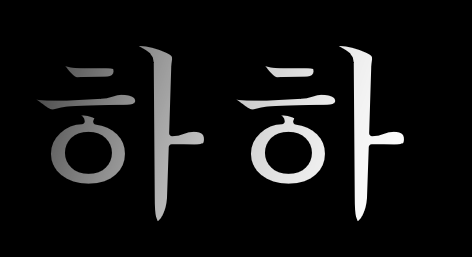

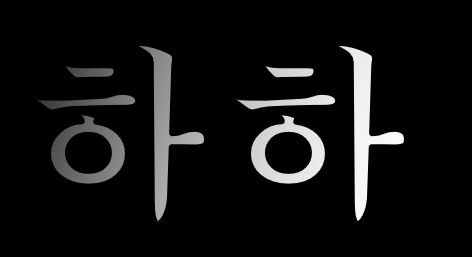

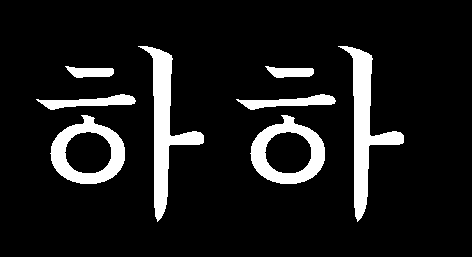

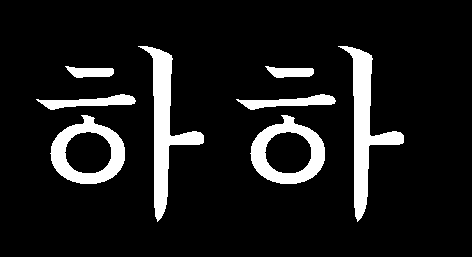

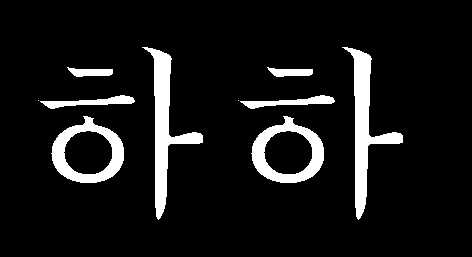

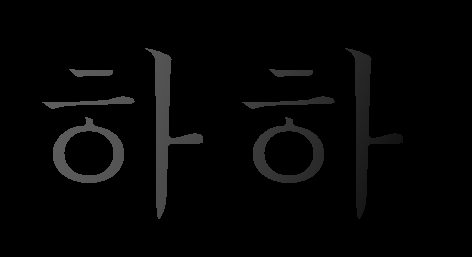

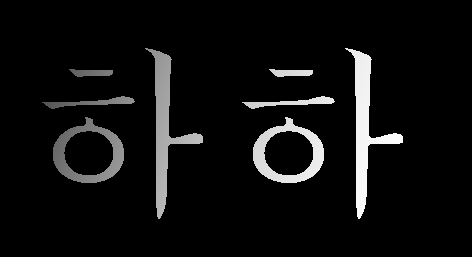

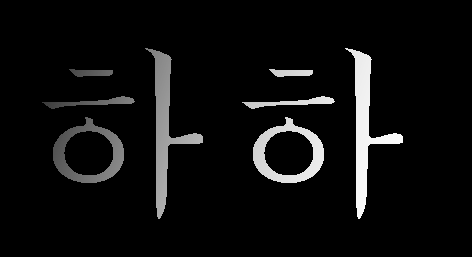

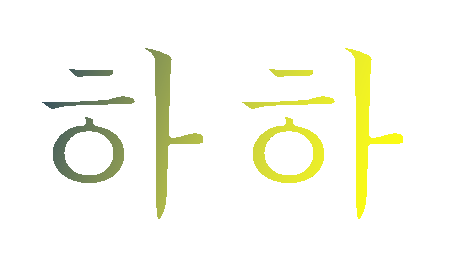

B:  16.35473123653707 -0.8905559994305636 -0.2613404946133616 1762
G:  16.100419929840566 0.8886410049560355 0.2565001020379869 3623
R:  16.08417380743871 0.8900390803955992 0.25663027406210137 4114
밝기 기울기(x, y화소당) =  16.180505293998372 1.5410848089714229 0.4471579743619065


In [ ]:
# 이미지 가장자리의 노이즈를 없애기 위해 침식 작용 - 사용 여부 추후 고민
kernel = np.ones((2,2),np.uint8)

# 이미지 침식 수행
eroded_image = cv2.erode(label_image, kernel, iterations = 2)
# cv2_imshow(eroded_image)


# 1단계: 텍스트와 배경(효과) 영역을 제외한 바탕영역 삭제
# 내가 봤을 때는 이게 그라데이션 부분의 이미지여야 함

# b, g, r, a = cv2.split(original_image)
b, g, r, a = cv2.split(only_grad_image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(a)

a = cv2.threshold(a, 200, 255, cv2.THRESH_BINARY)[1]
#cv2_imshow(a)


# 위에서 구한 color_list에 포함되는 색이 있으면 해당 영역을 제거
# 근데 위에서 only_gradation 이미지를 넘겨주면 불필요(위에서 처리를 했기 때문에)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] == 255 :
            if b[i][j] == 255 or g[i][j] == 255 or r[i][j] == 255 :
                a[i][j] = 0
cv2_imshow(a)

# erosion: a의 외곽 화소를 하나씩 깍아냄
aa = a.copy()
for i in range(1, a.shape[0]-1):
   for j in range(1, a.shape[1]-1):
       if aa[i][j] == 255 :
           if aa[i][j-1] != 255 or aa[i][j+1] != 255 or aa[i-1][j] != 255 or aa[i+1][j] != 255 :
               a[i][j] = 0
cv2_imshow(a)
a = cv2.erode(a, kernel, iterations = 1)

b = cv2.bitwise_and(b, b, mask=a)
g = cv2.bitwise_and(g, g, mask=a)
r = cv2.bitwise_and(r, r, mask=a)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

erd_image = cv2.bitwise_and(only_grad_image, only_grad_image, mask=a)
cv2_imshow(erd_image)

# 영상의 그라데이션 방향을 구하는 함수
def getGradationDir(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              npix += 1
              dx += (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              dy += (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것

  return dx/npix, dy/npix, npix

def getGradationDir2(gray, mask):
  npix = 0
  dx = 0
  dy = 0
  for i in range(gray.shape[0]-1):
      for j in range(gray.shape[1]-1):
          if mask[i][j] == 255 and mask[i][j+1] == 255 and mask[i+1][j] == 255 :
              x = (0 + gray[i][j+1] - gray[i][j])   # 이상한 부분. 조심할 것
              y = (0 + gray[i+1][j] - gray[i][j])   # 이상한 부분. 조심할 것
              if x==0 and y==0 : continue

              npix += 1
              mag = math.sqrt(x*x + y*y)
              dx += x / mag
              dy += y / mag

  return dx/npix, dy/npix, npix


bx, by, nb = getGradationDir2(b, a)
gx, gy, gb = getGradationDir2(g, a)
rx, ry, rb = getGradationDir2(r, a)
dx = math.sqrt(bx*bx + gx*gx + rx*rx)
dy = math.sqrt(by*by + gy*gy + ry*ry)

print("B: ", math.degrees(math.atan(by/bx)), bx, by, nb)
print("G: ", math.degrees(math.atan(gy/gx)),gx, gy, gb)
print("R: ", math.degrees(math.atan(ry/rx)),rx, ry, rb)


# zero division error 피하기 위함. 이 경우 90도가 됨
# 음수일 경우 반대 방향
try:
    if ((bx * gx * rx < 0 and by * gy * ry > 0) or (bx * gx * rx > 0 and by * gy * ry < 0)):
        angle = -(math.degrees(math.atan(dy/dx))) + 360
    else:
        angle = math.degrees(math.atan(dy/dx))
except:
    angle = 90
print("밝기 기울기(x, y화소당) = ", angle, dx, dy)

## 3. 2번을 활용해서 그라데이션이 적용된 두 개의 색 알아내기

In [ ]:
# 추가 수정 사항
# 1. 시작위치 설정하기(밑에는 이미지의 중앙으로)되어있음
# 2. 그라데이션 영역에 해당하는 부분만 화소 리스트에 넣기
# 3. 여러번 그어서 평균 내기

def inspect_pixels_along_angle(image, center, angle_deg, step_size):

    image_line = image.copy()   # 줄 긋기용 이미지
    print(image_line.shape)
    # 이미지의 높이와 너비 구하기
    height, width = image.shape[:2]

    # 주어진 각도를 라디안으로 변환
    angle_rad = math.radians(angle_deg)

    # 주어진 각도에 해당하는 직선 방향의 벡터 생성
    dx = math.cos(angle_rad)
    dy = math.sin(angle_rad)

    # 시작점 설정 (이미지의 중심)
    x, y = center

    # 픽셀 검사를 위한 빈 리스트 초기화
    inspected_pixels = []

    # 주어진 간격(step_size)으로 직선 방향으로 이동하며 픽셀 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
    # while -(width) <= x < width-1 and -(height) <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x += dx * step_size
        y += dy * step_size


    # 시작점 재설정
    x, y = center

    # 중앙 기준으로 반대(왼쪽 위) 방향으로 이동하면서 검사
    while 0 <= x < width-1 and 0 <= y < height-1:
        # 현재 위치의 픽셀값 검사
        pixel_value = image[int(round(y)), int(round(x))]
        inspected_pixels.append(pixel_value)
        image_line[int(round(y))][int(round(x))] = (51, 51, 221, 255)
        # image_line[int(round(y - center[0]))][int(round(x))] = (51, 51, 221, 255)

        # 다음 위치로 이동
        x -= dx * step_size
        y -= dy * step_size


    cv2_imshow(image_line)

    return inspected_pixels

In [ ]:
def euclidean_distance(pixel1, pixel2):
    return np.sqrt(np.sum((pixel2 - pixel1) ** 2))

def find_farthest_pixels(pixel_array):
    max_distance = 0
    farthest_pixels = None

    # 모든 픽셀 쌍 간의 거리를 계산하여 가장 큰 거리를 찾음
    for i in range(len(pixel_array)):
        for j in range(i + 1, len(pixel_array)):
            distance = euclidean_distance(pixel_array[i], pixel_array[j])
            if distance > max_distance:
                max_distance = distance
                farthest_pixels = (pixel_array[i], pixel_array[j])

    return farthest_pixels

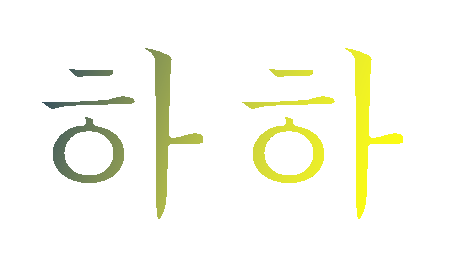

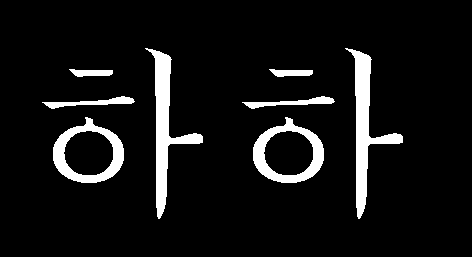

(257, 472, 4)


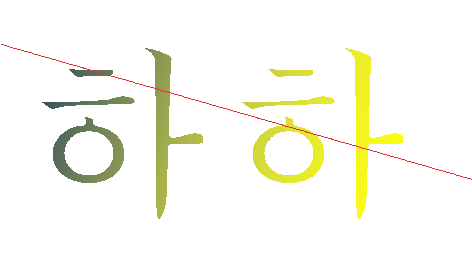

검사된 픽셀 값: [array([ 51, 226, 222, 255], dtype=uint8), array([ 51, 226, 223, 255], dtype=uint8), array([ 51, 227, 223, 255], dtype=uint8), array([ 51, 227, 223, 255], dtype=uint8), array([ 50, 228, 224, 255], dtype=uint8), array([ 50, 228, 224, 255], dtype=uint8), array([ 50, 228, 224, 255], dtype=uint8), array([ 49, 229, 225, 255], dtype=uint8), array([ 49, 229, 225, 255], dtype=uint8), array([ 49, 229, 226, 255], dtype=uint8), array([ 48, 230, 226, 255], dtype=uint8), array([ 48, 230, 226, 255], dtype=uint8), array([ 48, 230, 227, 255], dtype=uint8), array([ 48, 231, 227, 255], dtype=uint8), array([ 47, 231, 227, 255], dtype=uint8), array([ 47, 231, 228, 255], dtype=uint8), array([ 47, 231, 228, 255], dtype=uint8), array([ 47, 232, 228, 255], dtype=uint8), array([ 47, 232, 229, 255], dtype=uint8), array([ 46, 232, 229, 255], dtype=uint8), array([ 46, 233, 230, 255], dtype=uint8), array([ 46, 233, 230, 255], dtype=uint8), array([ 45, 233, 230, 255], dtype=uint8), array([0, 0, 0, 0], dty

In [ ]:
cv2_imshow(erd_image)

# 이미지의 중심 좌표 설정
center = (erd_image.shape[1] // 1.6, erd_image.shape[0] // 2)   # 소수 가능

# 주어진 각도로 이미지의 픽셀 검사 (예: 45도, 간격 1 픽셀)
angle_deg = int(angle)
step_size = 1

cv2_imshow(a)


inspected_pixels = inspect_pixels_along_angle(erd_image, center, angle_deg, step_size)

# 검사된 픽셀 값 출력
print("검사된 픽셀 값:", inspected_pixels)

farthest_pixels = find_farthest_pixels(inspected_pixels)
print("가장 먼 두 개의 픽셀 값:", farthest_pixels)

## 4. 번역된 글자로 텍스트를 만들고(ex. 영어) 해당 텍스트를 포함하는 가장 작은 직사각형을 그림

In [ ]:
font = ""


In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance
import random
import cv2
import numpy as np

In [ ]:
# {
#     style_class:"strglow",
#     font_color_type:GRADIENT,
#     font_color:[],
#     offsets:[ {
#         style:"stroke",
#         offset:20,
#         color_type:GRADIENT,
#         color:[30, #123453, #213453],
#     },
#     {
#         style:"glow",
#         offset:20,
#         color_Type:SIGNLE,
#         color:#123435,
#     }
#     ]
# }

In [ ]:
# "font_color": [272, (4, 3, 1), (221, 158, 82)],
# BGR 순서대로 기입

json_data = {
    "style_class": "str",
    "font_color_type": "GRADIENT",
    "font_size": 100,
    "font_color": [16, (82, 158, 144), (29, 247, 245)],
    "offsets": [
        {
            "style": "stroke",
            "offset": 3,
            "color_type": "SINGLE",
            "color": [(0, 0, 0)],
        }
    ]
}

In [ ]:
def draw_gradient_rect(image, start_color, end_color, angle):
    """
    그라데이션 직사각형을 그리는 함수
    :param image: 이미지를 저장할 배열
    :param start_color: 시작 색상 (B, G, R)
    :param end_color: 끝 색상 (B, G, R)
    :param angle: 그라데이션의 각도 (도 단위)
    """
    height, width = image.shape[:2]

    # 그라데이션을 저장할 빈 이미지 생성
    gradient = np.zeros((height, width, 3), dtype=np.uint8)

    # 각도에 따른 방향 벡터 계산
    angle_rad = np.radians(angle)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)

    # 그라데이션 색상 채우기
    for y in range(height):
        for x in range(width):
            # 픽셀 위치에서의 비율 계산
            px = x * cos_a + y * sin_a
            ratio = px / (width * cos_a + height * sin_a)
            ratio = np.clip(ratio, 0, 1)

            # 시작 색상과 끝 색상 사이의 보간
            color = start_color * (1 - ratio) + end_color * ratio
            gradient[y, x] = color

    # 그라데이션 이미지를 원본 이미지에 적용
    np.copyto(image, gradient)

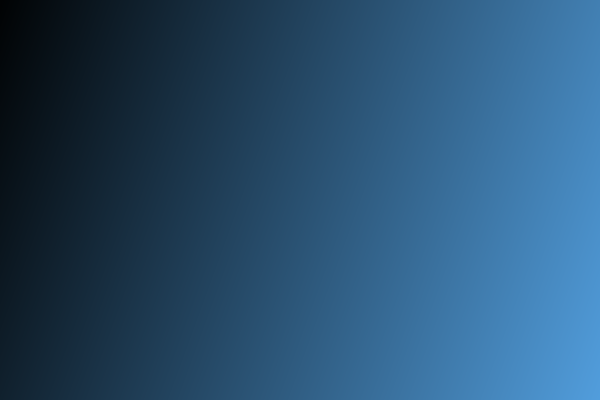

In [ ]:
# 빈 이미지 생성 (흰색 배경)
image = np.ones((400, 600, 3), dtype=np.uint8) * 255

# JSON 데이터에서 값 추출
start_color = np.array([4, 3, 1])  # (B, G, R)
end_color = np.array([221, 158, 82])  # (B, G, R)
angle = 20  # 각도

# 그라데이션 직사각형 그리기
draw_gradient_rect(image, start_color, end_color, angle)

# 결과 이미지를 image2에 저장
image2 = image.copy()

# 결과 이미지 출력
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def create_basic_stroke(json_data, font_path, text, save_path):
    # 일단 임시적으로 세팅을 이렇게 함
    color_list = [(50, 50, 50, 255), (150, 150, 150, 255)]

    # 이미지 생성
    img = Image.new(mode='RGBA', size=(800, 800), color=(0, 0, 0, 0))
    draw = ImageDraw.Draw(img)

    # 텍스트 배치 위치
    x = img.width//2
    y = img.height//2

    # 색상 설정
    fill_color, stroke_color = color_list[0], color_list[1]

    # 스타일 수치 설정
    stroke_offset = ""
    for offset in json_data["offsets"]:
        if offset["style"] == "stroke":
            stroke_offset = offset["offset"]
            break
    print("stroke_offset: ", stroke_offset)

    # 폰트 사이즈 랜덤 선택
    font_size = json_data["font_size"]
    print("font_size: ", font_size)

    # 폰트 생성
    font = ImageFont.truetype(font_path, font_size)
    # font = ImageFont.truetype(ImageFont.load_default(), font_size)

    text_angle = 45

    # 테두리 그리기
    draw.text((x, y), text, font=font, anchor='mm', tilt_angle=text_angle, fill=fill_color, stroke_width=stroke_offset, stroke_fill=stroke_color)

    # 이미지 저장
    # img_path = f'{self.img_dir_path}/{font_name}_{text}_{font_size}_str.png'
    img.save(save_path, format='PNG')
    img.show()

In [ ]:
# font_path = "Comic-Art.ttf"
# font_path = "Squashy Flow.ttf"
# font_path = "Comic Story.ttf"
font_path = "times.ttf"
text = "haha"
output_path = "output_image_haha.png"

create_basic_stroke(json_data, font_path, text, output_path)

stroke_offset:  3
font_size:  100


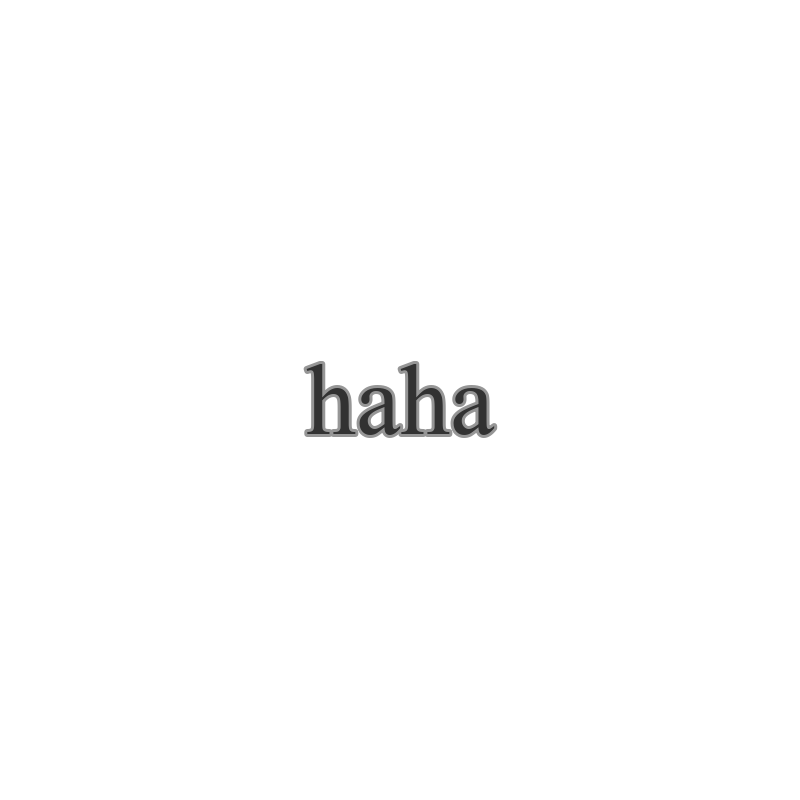

In [ ]:
pillow_image = Image.open(output_path)

# Pillow 이미지를 NumPy 배열로 변환 (RGB 채널 순서)
numpy_image = np.array(pillow_image)

# RGB를 BGR로 색상 채널 순서 변경
opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGBA2BGRA)
cv2_imshow(opencv_image)

In [ ]:
def crop_image(image):
    # 알파 채널 추출
    alpha_channel = image[:, :, 3]

    # 알파 채널에서 값이 0이 아닌 부분의 좌표 찾기
    nonzero_coords = np.argwhere(alpha_channel > 0)

    # 최소 바운딩 박스 계산
    top_left = np.min(nonzero_coords, axis=0)
    bottom_right = np.max(nonzero_coords, axis=0)

    # 최소 바운딩 박스를 이용하여 이미지를 자르기
    cropped_image = image[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]

    return cropped_image

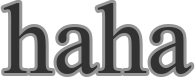

(77, 195, 4)


In [ ]:
crop_img = crop_image(opencv_image)
cv2_imshow(crop_img)
print(crop_img.shape)

## 5. 4에서 구한 직사각형에 아까 구한 정보로 그라데이션을 구현

In [ ]:
def get_minimum_rect(image):
    # 알파 채널 추출
    alpha_channel = image[:, :, 3]

    # 알파 채널에서 값이 0이 아닌 부분의 좌표 찾기
    nonzero_coords = np.argwhere(alpha_channel > 0)

    # 최소 바운딩 박스 계산
    top_left = np.min(nonzero_coords, axis=0)
    bottom_right = np.max(nonzero_coords, axis=0)

    # 가로와 세로 너비 계산
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    print("가로 너비:", width)
    print("세로 너비:", height)
    return width, height

In [ ]:
width, height = get_minimum_rect(crop_img)
print(width, height)

가로 너비: 194
세로 너비: 76
194 76


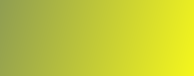

In [ ]:
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# "font_color": [16, (245, 247, 29), (144, 158, 82)],

# JSON 데이터에서 값 추출
start_color = np.array(json_data["font_color"][1])  # (B, G, R)
end_color = np.array(json_data["font_color"][2])  # (B, G, R)

angle = json_data["font_color"][0]

draw_gradient_rect(image, start_color, end_color, angle)
# 결과 이미지를 image2에 저장
image2 = image.copy()

# 결과 이미지 출력
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

6번 할 차례

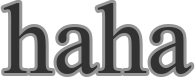

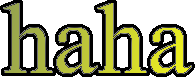

(77, 195, 4)


True

In [ ]:
test_img = crop_img.copy()
cv2_imshow(test_img)

for i in range(crop_img.shape[0]):
    for j in range(crop_img.shape[1]):
        if (np.array_equal(crop_img[i][j][0:3], [50, 50, 50])):
            test_img[i][j][0:3] = image2[i][j][0:3]
            test_img[i][j][3] = 255
        elif (np.array_equal(crop_img[i][j][0:3], [150, 150, 150])):
            test_img[i][j][0:3] = [0, 0, 0]
            test_img[i][j][3] = 255
        # else:
        #     test_img[i][j][0:3] = image2[i][j][0:3]
        #     test_img[i][j][3] = 255

cv2_imshow(test_img)
print(test_img.shape)

test_img_pil = Image.fromarray(test_img)

# Pillow 이미지를 OpenCV 이미지로 변환
test_img_cv = np.array(test_img_pil)

# OpenCV 이미지를 파일로 저장
cv2.imwrite("haha.png", test_img_cv)

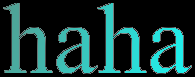

In [ ]:
# 가우시안 블러 적용
# blurred_image = cv2.GaussianBlur(test_img, (5, 5), 0)
test_img_bgr = cv2.cvtColor(test_img, cv2.COLOR_RGBA2BGR)

# 바이레터럴 필터링 적용
smoothed_image = cv2.bilateralFilter(test_img_bgr, 9, 75, 75)
cv2_imshow(smoothed_image)



## 단일인 경우 test

[((0, 0, 0, 0), 101254), ((92, 54, 229, 255), 219), ((94, 55, 228, 255), 199), ((160, 93, 153, 255), 199), ((157, 92, 158, 255), 193), ((172, 100, 124, 255), 184), ((96, 56, 227, 255), 182), ((161, 94, 150, 255), 180), ((115, 67, 212, 255), 180), ((100, 58, 224, 255), 175), ((173, 101, 121, 255), 174), ((88, 51, 232, 255), 170), ((119, 69, 209, 255), 161), ((174, 101, 119, 255), 161), ((170, 99, 130, 255), 146), ((159, 92, 155, 255), 145), ((166, 97, 140, 255), 140), ((158, 92, 156, 255), 139), ((86, 50, 233, 255), 138), ((108, 63, 218, 255), 136), ((91, 53, 230, 255), 135), ((139, 81, 186, 255), 131), ((144, 84, 180, 255), 131), ((90, 52, 231, 255), 130), ((138, 80, 188, 255), 129), ((141, 82, 184, 255), 128), ((89, 52, 231, 255), 124), ((148, 86, 174, 255), 123), ((116, 68, 211, 255), 122), ((142, 83, 182, 255), 120), ((98, 57, 225, 255), 119), ((162, 95, 148, 255), 119), ((99, 58, 225, 255), 118), ((117, 68, 210, 255), 117), ((163, 95, 145, 255), 116), ((156, 91, 160, 255), 112), ((

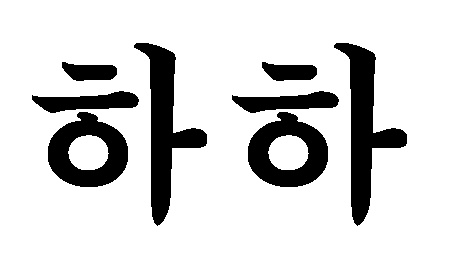

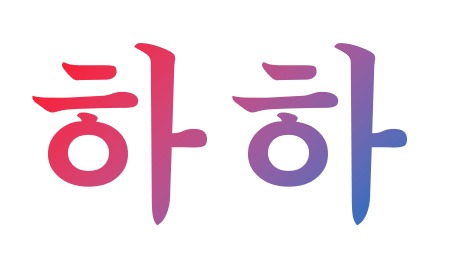

In [ ]:
IMAGE_PATH = "하하45.png"

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
label_image, only_grad_image = getGradationPart(image, 2)

cv2_imshow(label_image)
cv2_imshow(only_grad_image)

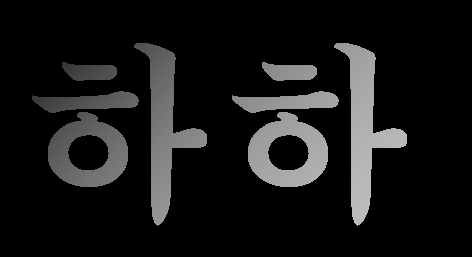

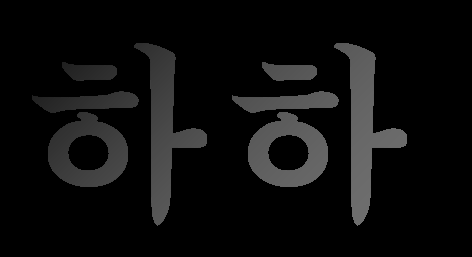

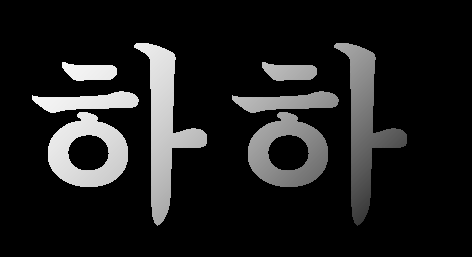

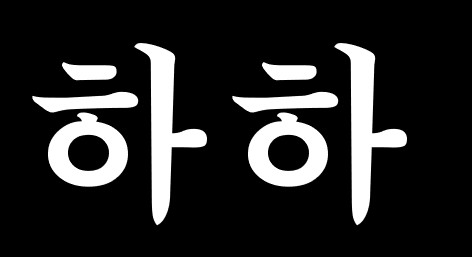

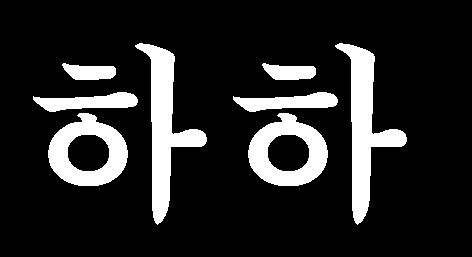

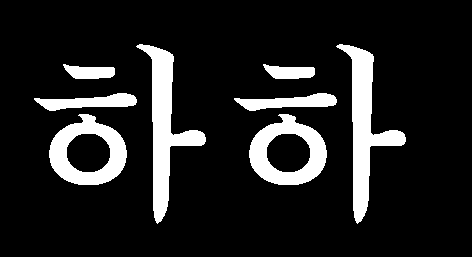

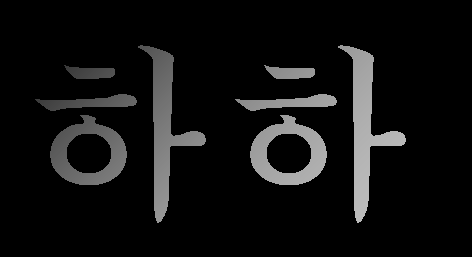

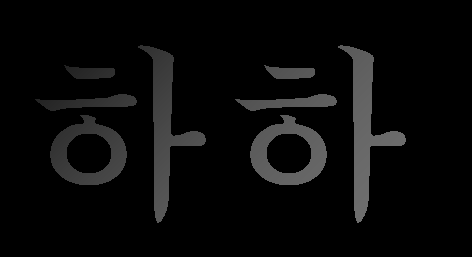

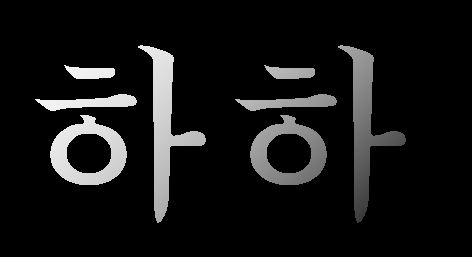

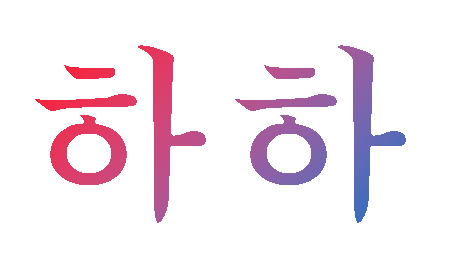

B:  45.0 0.707106781186542 0.707106781186542 3963
G:  45.0 0.707106781186511 0.707106781186511 2293
R:  45.0 -0.7071067811865787 -0.7071067811865787 5604
밝기 기울기(x, y화소당) =  45.0 1.224744871391583 1.224744871391583


In [ ]:
# 이미지 가장자리의 노이즈를 없애기 위해 침식 작용 - 사용 여부 추후 고민
kernel = np.ones((2,2),np.uint8)

# 이미지 침식 수행
eroded_image = cv2.erode(label_image, kernel, iterations = 2)
# cv2_imshow(eroded_image)


# 1단계: 텍스트와 배경(효과) 영역을 제외한 바탕영역 삭제
# 내가 봤을 때는 이게 그라데이션 부분의 이미지여야 함

# b, g, r, a = cv2.split(original_image)
b, g, r, a = cv2.split(only_grad_image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(a)

a = cv2.threshold(a, 200, 255, cv2.THRESH_BINARY)[1]
#cv2_imshow(a)


# 위에서 구한 color_list에 포함되는 색이 있으면 해당 영역을 제거
# 근데 위에서 only_gradation 이미지를 넘겨주면 불필요(위에서 처리를 했기 때문에)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] == 255 :
            if b[i][j] == 255 or g[i][j] == 255 or r[i][j] == 255 :
                a[i][j] = 0
cv2_imshow(a)

# erosion: a의 외곽 화소를 하나씩 깍아냄
aa = a.copy()
for i in range(1, a.shape[0]-1):
   for j in range(1, a.shape[1]-1):
       if aa[i][j] == 255 :
           if aa[i][j-1] != 255 or aa[i][j+1] != 255 or aa[i-1][j] != 255 or aa[i+1][j] != 255 :
               a[i][j] = 0
cv2_imshow(a)
a = cv2.erode(a, kernel, iterations = 1)

b = cv2.bitwise_and(b, b, mask=a)
g = cv2.bitwise_and(g, g, mask=a)
r = cv2.bitwise_and(r, r, mask=a)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

erd_image = cv2.bitwise_and(only_grad_image, only_grad_image, mask=a)
cv2_imshow(erd_image)

bx, by, nb = getGradationDir2(b, a)
gx, gy, gb = getGradationDir2(g, a)
rx, ry, rb = getGradationDir2(r, a)
dx = math.sqrt(bx*bx + gx*gx + rx*rx)
dy = math.sqrt(by*by + gy*gy + ry*ry)

print("B: ", math.degrees(math.atan(by/bx)), bx, by, nb)
print("G: ", math.degrees(math.atan(gy/gx)),gx, gy, gb)
print("R: ", math.degrees(math.atan(ry/rx)),rx, ry, rb)


# zero division error 피하기 위함. 이 경우 90도가 됨
# 음수일 경우 반대 방향
try:
    if ((bx * gx * rx < 0 and by * gy * ry > 0) or (bx * gx * rx > 0 and by * gy * ry < 0)):
        angle = -(math.degrees(math.atan(dy/dx))) + 360
    else:
        angle = math.degrees(math.atan(dy/dx))
except:
    angle = 90
print("밝기 기울기(x, y화소당) = ", angle, dx, dy)

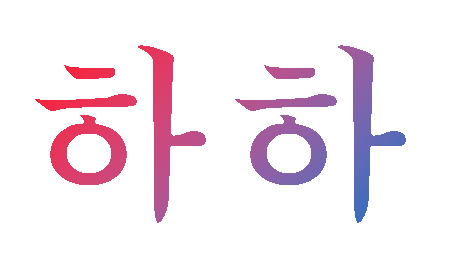

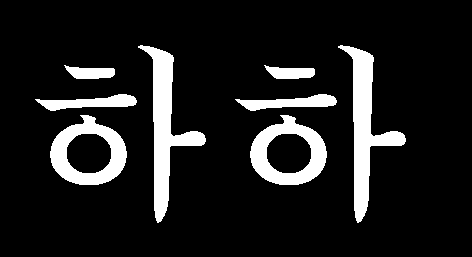

(257, 472, 4)


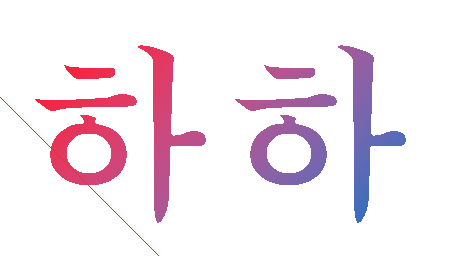

검사된 픽셀 값: [array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0], dtype=uint8), arr

In [ ]:
cv2_imshow(erd_image)

# 이미지의 중심 좌표 설정
center = (erd_image.shape[1] // 3, erd_image.shape[0] // 1.01)   # 소수 가능

# 주어진 각도로 이미지의 픽셀 검사 (예: 45도, 간격 1 픽셀)
angle_deg = int(angle)
step_size = 1

cv2_imshow(a)


inspected_pixels = inspect_pixels_along_angle(erd_image, center, angle_deg, step_size)

# 검사된 픽셀 값 출력
print("검사된 픽셀 값:", inspected_pixels)

farthest_pixels = find_farthest_pixels(inspected_pixels)
print("가장 먼 두 개의 픽셀 값:", farthest_pixels)

꼭 그 한 라인에 색이 다 안들어올 수 있음. 진짜 여러번 해서 최소와 최대를 갱신해나가야 함

In [ ]:
json_data = {
    "style_class": "none",
    "font_color_type": "GRADIENT",
    "font_size": 110,
    "font_color": [angle, (111, 65, 216), (186, 108,  71)],
    "offsets": [
    ]
}

In [ ]:
# 119, 69, 209
# 86, 108,  71
# 일단 두개 찾았다 치고
font_path = "times.ttf"
text = "haha"
output_path = "output_image_haha45.png"

create_basic_stroke(json_data, font_path, text, output_path)

stroke_offset:  
font_size:  110


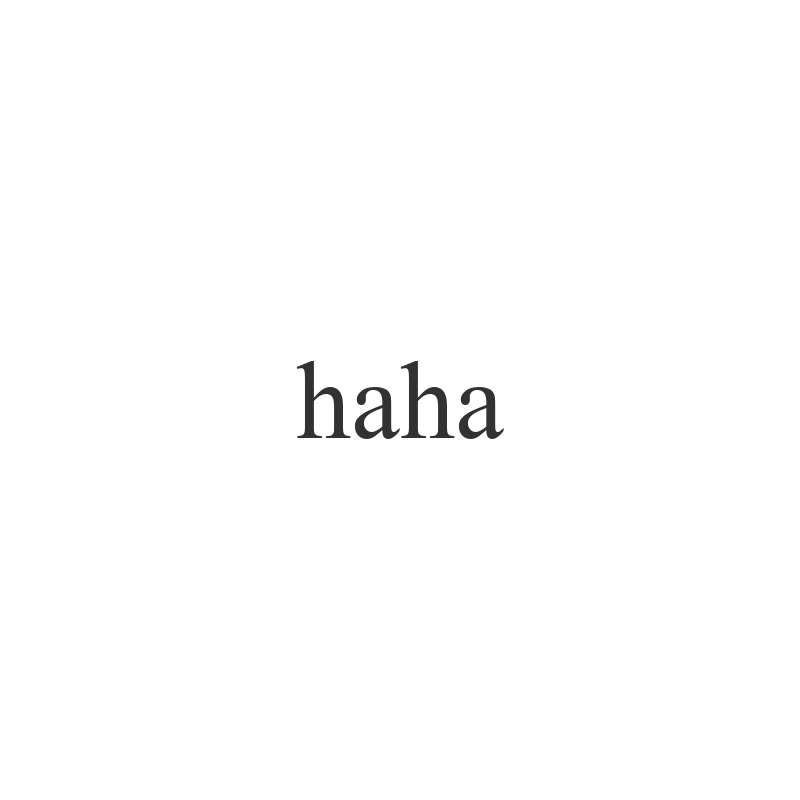

In [ ]:
pillow_image = Image.open(output_path)

# Pillow 이미지를 NumPy 배열로 변환 (RGB 채널 순서)
numpy_image = np.array(pillow_image)

# RGB를 BGR로 색상 채널 순서 변경
opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGBA2BGRA)
cv2_imshow(opencv_image)

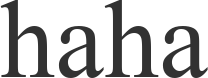

(78, 208, 4)
가로 너비: 207
세로 너비: 77
207 77


In [ ]:
crop_img = crop_image(opencv_image)
cv2_imshow(crop_img)
print(crop_img.shape)

width, height = get_minimum_rect(crop_img)
print(width, height)

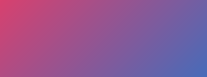

In [ ]:
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# "font_color": [16, (245, 247, 29), (144, 158, 82)],

# JSON 데이터에서 값 추출
start_color = np.array(json_data["font_color"][1])  # (B, G, R)
end_color = np.array(json_data["font_color"][2])  # (B, G, R)

angle = json_data["font_color"][0]

draw_gradient_rect(image, start_color, end_color, angle)
# 결과 이미지를 image2에 저장
image2 = image.copy()

# 결과 이미지 출력
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

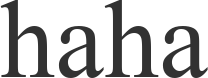

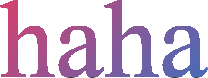

(78, 208, 4)


True

In [ ]:
test_img = crop_img.copy()
cv2_imshow(test_img)

for i in range(crop_img.shape[0] - 1):
    for j in range(crop_img.shape[1] - 1):
        if (np.array_equal(crop_img[i][j][0:3], [50, 50, 50])):
            test_img[i][j][0:3] = image2[i][j][0:3]
            test_img[i][j][3] = 255
        elif (np.array_equal(crop_img[i][j][0:3], [150, 150, 150])):
            test_img[i][j][0:3] = [0, 0, 0]
            test_img[i][j][3] = 255
        # else:
        #     test_img[i][j][0:3] = image2[i][j][0:3]
        #     test_img[i][j][3] = 255

cv2_imshow(test_img)
print(test_img.shape)

test_img_pil = Image.fromarray(test_img)

# Pillow 이미지를 OpenCV 이미지로 변환
test_img_cv = np.array(test_img_pil)

# OpenCV 이미지를 파일로 저장
cv2.imwrite("haha.png", test_img_cv)

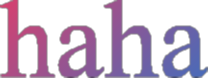

In [ ]:
# test_img_bgr = cv2.cvtColor(test_img_cv, cv2.COLOR_RGBA2BGR)
smoothed_image = cv2.GaussianBlur(test_img_cv, (3, 3), 0)

# 결과 저장
cv2_imshow(smoothed_image)